In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q43[SQ002]','Q43[SQ003]','Q43[SQ004]','Q43[SQ005]','Q43[SQ007]','Q43[SQ008]','Q43[SQ009]','Q43[SQ010]','Q43[SQ011]','Q43[SQ012]']
columns_names = [
    'I think that I would like to use this system frequently.',
    'I found the system unnecessarily complex.',
    'I thought the system was easy to use.',
    'I think that I would need the support of a technical person to be able to use this system.',
    'I found the various functions in this system were well integrated.',
    'I thought there was too much inconsistency in this system.',
    'I would imagine that most people would learn to use this system very quickly.',
    'I found the system very cumbersome to use.',
    'I felt very confident using the system.',
    'I needed to learn a lot of things before I could get going with this system.'
]
options = [
    '1 - Strongly disagree',
    '2 - Disagree',
    '3 - Neither agree nor disagree',
    '4 - Agree',
    '5 - Strongly agree',
    'No answer',
]
profile = data[columns]

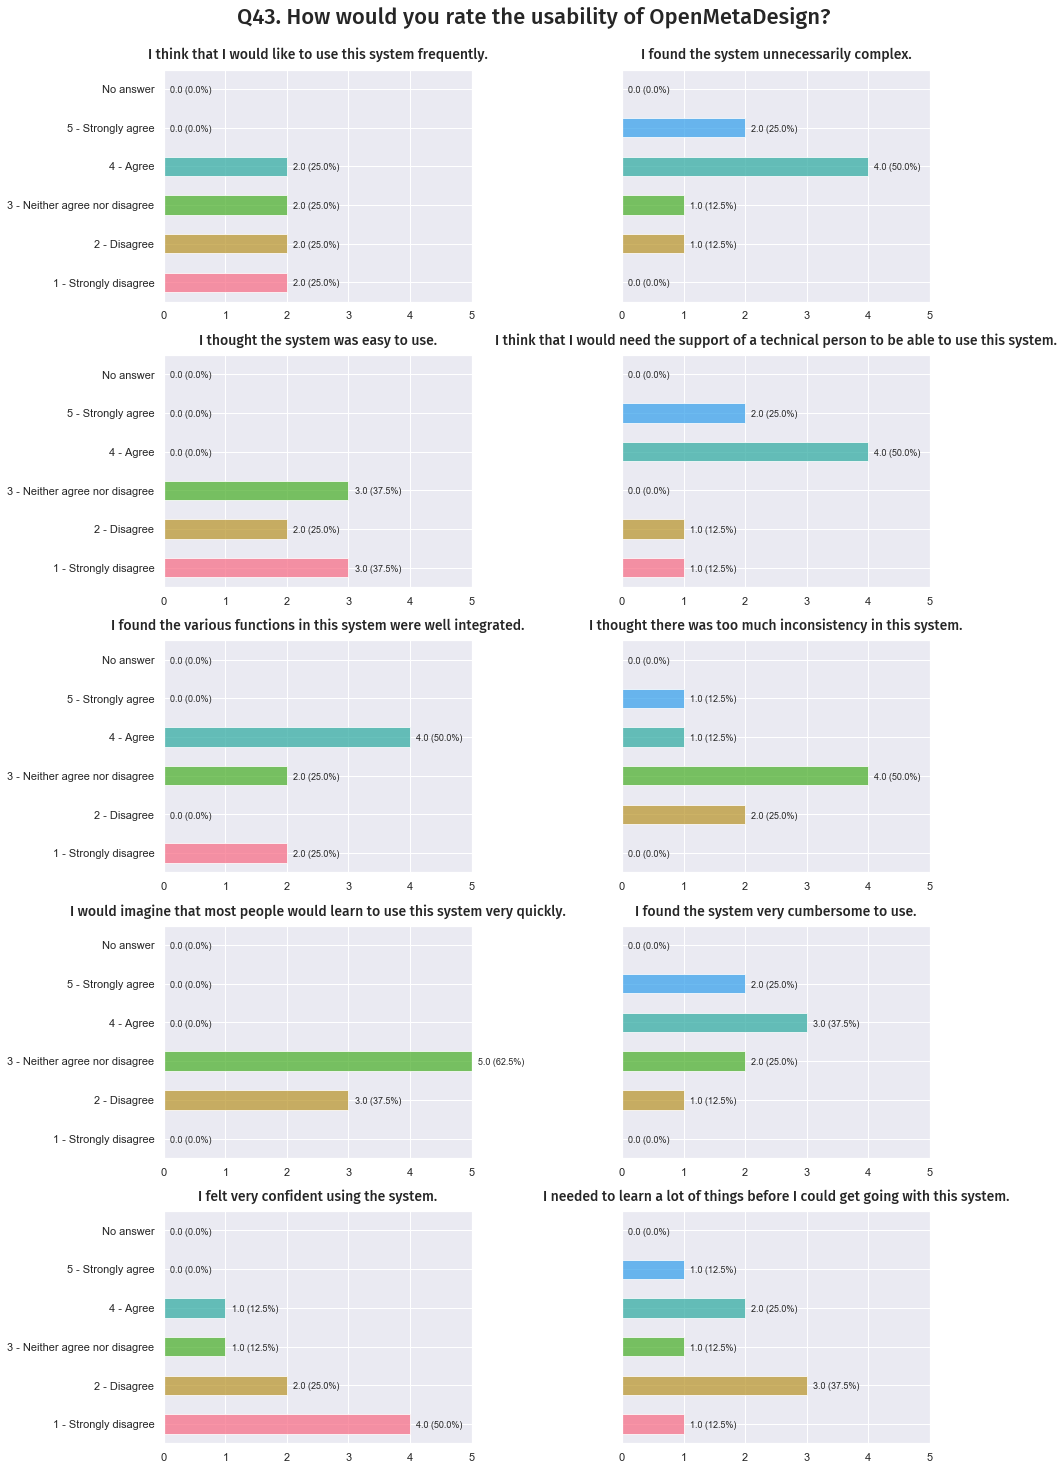

In [8]:
# All subquestions in the same plot
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.8)
fig.suptitle('Q43. How would you rate the usability of OpenMetaDesign?', fontsize=22, fontname='Fira Sans', fontweight="500", y=1.02)
axes = []
for k, i in enumerate(columns):
    if k == 0:
        ax = fig.add_subplot(5, 2, k+1)
        axes.append(ax)
    else:
        ax = fig.add_subplot(5, 2, k+1, sharey=axes[0])
        axes.append(ax)
    ax.set_title(columns_names[k], fontsize=14, y=1.02, fontname='Fira Sans', fontweight="500")
    this_profile = profile[i].str.strip().fillna(value="No answer").value_counts(dropna=False).reindex(options).fillna(value=0)
    my_colors = sns.color_palette("husl", len(this_profile)) # Set color palette
    this_profile.plot(kind='barh', color=my_colors, alpha=0.75, rot=0)
    ax.set_xlim([0, 5])
    perc = profile[i].str.strip().fillna(value="No answer").value_counts(normalize=True, dropna=False) * 100
    perc = perc.reindex(options).fillna(value=0)
    for l, v in enumerate(this_profile):
        ax.text(v + .1, l-0.1, str(v)+" ("+str(perc[l])+"%)", fontweight='500', fontsize=9)
plt.tight_layout()
plt.savefig("svg/Q43.svg", bbox_inches="tight")
plt.savefig("png/Q43.png", dpi=300, bbox_inches="tight")